In [2]:
import pandas as pd
'''Loading the dataset'''
# The names of the columns were taken from the iris.names file
header_list = ["Sepal length (cm)", "Sepal width (cm)", "Petal length (cm)", "Petal width (cm)", "Class"]
iris_data = pd.read_csv("iris.data", sep=",", names=header_list)

In [3]:
'''Exploratory Data Analysis'''
# Total number of examples
print("Total number of examples:", iris_data.shape[0])
# Number of examples per iris species
print(iris_data.Class.value_counts())
# Inspecting the head of the dataset
print(iris_data.head())
# Descriptive statistics
print(iris_data.describe())

Total number of examples: 150
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64
   Sepal length (cm)  Sepal width (cm)  Petal length (cm)  Petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

         Class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
       Sepal length (cm)  Sepal width (cm)  Petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.00000

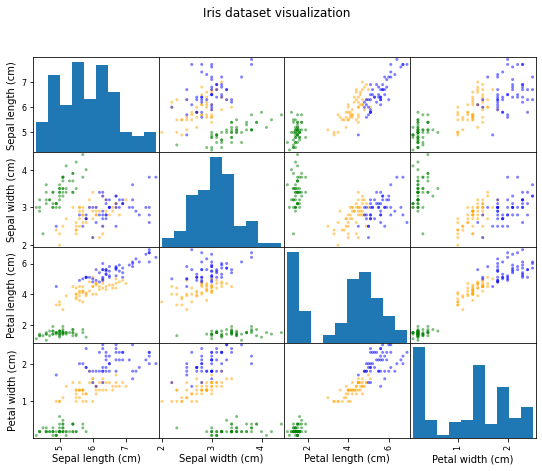

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
'''Visualizing the dataset'''
colors = iris_data["Class"].replace({'Iris-setosa': 'green', 'Iris-versicolor': 'orange', 'Iris-virginica': 'blue'})
pd.plotting.scatter_matrix(iris_data, figsize=(9, 7), c=colors)
plt.suptitle('Iris dataset visualization')
plt.show()

In [7]:
'''Splitting the data into test, cross-validation and test sets'''
from sklearn.model_selection import train_test_split
# Dividing the dataset into features and labels
iris_data.Class.astype("category")  # Setting the Class column to a "category" type
X = iris_data.select_dtypes(include="float")  # features
y = iris_data['Class']   # labels

# Dividing the dataset into training, cross-validation and test sets
X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, train_size=0.5, test_size=0.5, random_state=10)

In [8]:
from sklearn.preprocessing import StandardScaler
'''Feature scaling'''
# Using standardization method to normalise the data
# z = (x-mean)/sd
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_val = scaler.fit_transform(X_val)
standardized_X_test = scaler.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

'''Training different types of classifies'''
# Logistic Regression
LR = LogisticRegression(multi_class="multinomial")
LR.fit(standardized_X_train, y_train)


# Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=10)
DT.fit(standardized_X_train, y_train)

# K Nearest Neighbors Classifier
KNN = KNeighborsClassifier()
KNN.fit(standardized_X_train, y_train)

# Support Vector Machine
SVM = SVC(C=5, gamma='auto')
SVM.fit(standardized_X_train, y_train)

SVC(C=5, gamma='auto')

In [10]:
'''Evaluating the performance of the classifiers on the validation set'''
from sklearn.metrics import accuracy_score
accuracies = []
# LR
predictions_LR = LR.predict(standardized_X_val)
accuracy_LR = accuracy_score(y_val, predictions_LR)
accuracies.append(("LR", accuracy_LR))
# DT
predictions_DT = DT.predict(standardized_X_val)
accuracy_DT = accuracy_score(y_val, predictions_DT)
accuracies.append(("DT", accuracy_DT))
#KNN
predictions_KNN = KNN.predict(standardized_X_val)
accuracy_KNN = accuracy_score(y_val, predictions_KNN)
accuracies.append(("KNN", accuracy_KNN))
#SVM
predictions_SVM = SVM.predict(standardized_X_val)
accuracy_SVM = accuracy_score(y_val, predictions_SVM)
accuracies.append(("SVM", accuracy_SVM))

for name, accuracy in accuracies:
    accuracy_table = "{} {}".format(name, round(accuracy, 3))
    print(accuracy_table)

LR 0.967
DT 0.967
KNN 0.9
SVM 1.0


In [12]:
'''Testing the classifier with highest accuracy score - SVM'''
from sklearn.metrics import classification_report
test_pred = SVM.predict(standardized_X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test accuracy", test_accuracy)
print(classification_report(y_test, test_pred))

Test accuracy 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

